**Summary**

Our project looks at the research question: “What role does party affiliation, education level, and race play in the opposition or support of a law which would require a person to obtain a police permit before he or she could buy a gun?  We looked at data provided by the General Social Survey and chose specific variables to see how they related to to opinions regarding gun laws. The key variables we chose to look at are party affiliation, education level, and race. After determining the key variables we wanted to look at we cleaned the dataset and then visualized the data. We visualized the data using a stacked bar chart to look at the relationship between party affiliation and opinion on a gun law, a grouped bar graph to look at the relationship between race and opinion on a gun law, and three different histograms looking at the relationship between education level and opinion on a gun law. After visualizing the data, we interpreted the data. When looking at the stacked bar chart, we found those who identified as strongly democratic had the highest percentage of being favor of the gun control law and that those who identified as strongly republican had the highest percentage of being opposed to the gun control law. We found that, generally, those who identified as more democratic leaning were more in favor of being in favor of the gun control law and those who identified as more republican leaning were more opposed to the gun control law. When looking at the grouped bar graph, we found that those who identify as black and other were significantly underrepresented than those who identity as white. However, more blacks and whites were in favor of gun control law than opposing the gun control law. However, those who identified as other opposed the gun control law than being in favor. Lastly, when looking at the histograms, we found that those who pursued education beyond high school were more likely to be in favor of a gun law than those who only graduated high school, dropped out of high school, or didn’t attend high school.


In [2]:
import pandas as pd # Importing pandas package into the workspace
import numpy as np # Importing numpy package into the workspace
import matplotlib.pyplot as plt #Importing matplot into the workspace
import seaborn as sns # Importing seaborn package into the workspace

**Data**

The data utilized for this project was obtained from the General Social Survey which provides insight into the social, political, and  economic views of Americans over time. Although the survey has been conducted since 1972, the data used for this project was obtained from 2022. The analysis of the question, “What role does party affiliation, education level, and race play in the opposition or support of a law which would require a person to obtain a police permit before he or she could buy a gun?” uses the key variables “partyid,” “educ,” “race,” and “gunlaw” to examine a more recent public opinion. The “partyid” variable indicates an individual’s political affiliation, with a variety of categories including: independent (neither or no response), strong republican, not very strong republican, independent (close to republican), strong democrat, not very strong democrat, independent (close to democrat). For this variable, the counts were not  evenly distributed with those being independent (neither or no response) as the mode with 84 individuals and the least amount being from those not of the two parties (other party) with 14 individuals.
For the variable, “educ,” participants assigned a numerical value to their highest level of formal education, with one representing first grade, and 20 representing eight years of college. Each intervening number in between those two values, corresponds to the sequential years of education. The lowest number, zero, represents no formal education. There were outliers for the variable, but were still included, to maintain an accurate cross-section of opinions. The “gunlaw” variable measured the the participants opinion for mandating police permits for obtain a gun. Participants were able to choose “in favor” or “oppose.” In contrast with “partyid” and “educ” the choices for “race” were much less extensive. Participants could either pick “black,” “white,” or “other” for the “race” variable.
During the data cleaning process, there were issues with missing values. There were gaps across all of the variables. To mitigate this, different strategies were used depending on the particular variable. As a way to maintain the integrity of the data, for numerical variables such as “educ,” the average was taken and put in place of the gap, while for those that were categorical were input as “not disclosed, “no response,” or “other.” The most challenging variable was “gunlaw” as it had 131 missing values, which was resolved using the method mentioned above. Reading and preparing the data for analysis however, went smoothly.


In [3]:
var_list = ['partyid',
           'educ',
           'race',
           'gunlaw'] # List of variables to save
output_file = 'raw_gss_data_.csv' # Name of the file to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(37): # r each chunk of the data
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1+k) + '.csv' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_csv(url,low_memory=False) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode
    k =+ 1

https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
   Unnamed: 0  year  id            wrkstat  hrs1  hrs2 evwork    occ  \
0           1  1972   1  working full time   NaN   NaN    NaN  205.0   
1           2  1972   2            retired   NaN   NaN    yes  441.0   
2           3  1972   3  working part time   NaN   NaN    NaN  270.0   
3           4  1972   4  working full time   NaN   NaN    NaN    1.0   
4           5  1972   5      keeping house   NaN   NaN    yes  385.0   

   prestige        wrkslf  ...  instype02  instype03  instype04  \
0      50.0  someone else  ...        NaN        NaN        NaN   
1      45.0  someone else  ...        NaN        NaN        NaN   
2      44.0  someone else  ...        NaN        NaN        NaN   
3      57.0  someone else  ...        NaN        NaN        NaN   
4      40.0  someone else  ...        NaN        NaN        NaN   

   totalincentive  wtssps_nea  wtssnrps_nea  wtssps_next  wtssnrps_next  \
0             NaN         NaN       

In [4]:
unique_partyid= df['partyid'].unique() # Check unique values for 'partyid' variable
print(unique_partyid)

print(df['partyid'].value_counts(), '\n') # Check value counts for 'partyid' variable

nan_count = df['partyid'].isna().sum()
print("Number of NaN values in 'partyid' column:", nan_count) # Number of NaN values

missing_values = df['partyid'].isnull().sum() # Check missing values
print("Number of missing values in partyid:", missing_values)

['independent (neither, no response)' 'not very strong democrat'
 'independent, close to republican' 'not very strong republican'
 'strong republican' 'independent, close to democrat' 'strong democrat'
 'other party' nan]
independent (neither, no response)    84
strong republican                     70
not very strong republican            61
independent, close to republican      50
strong democrat                       48
not very strong democrat              31
independent, close to democrat        30
other party                           14
Name: partyid, dtype: int64 

Number of NaN values in 'partyid' column: 2
Number of missing values in partyid: 2


In [5]:
df['partyid'].fillna('independent (neither, no response)', inplace=True) # Replacing the NaN values with the independent (neither, no repsonse) for the variable
print(df['partyid'].value_counts(), '\n') # Making sure NaNs were replaced

print(df['partyid'].describe()) # Looking at statistics

independent (neither, no response)    86
strong republican                     70
not very strong republican            61
independent, close to republican      50
strong democrat                       48
not very strong democrat              31
independent, close to democrat        30
other party                           14
Name: partyid, dtype: int64 

count                                    390
unique                                     8
top       independent (neither, no response)
freq                                      86
Name: partyid, dtype: object


In [6]:
unique_educ= df['educ'].unique() # Check unique values for 'educ' variable
print(unique_educ)

print(df['educ'].value_counts(), '\n') # Check the value counts for 'educ' variable

nan_count = df['educ'].isna().sum()
print("Number of NaN values in 'educ' column:", nan_count) # Number of NaN values

missing_values = df['educ'].isnull().sum() # Check missing values
print("Number of missing values in educ:", missing_values)

avg_educ = df['educ'].mean() # Calculate average for the data in the variable and rounding to ensure consistency
avg_educ = round(avg_educ)
print(avg_educ)

[13. 16. 12. 17. 14.  8.  9. 10. 15. 20. 18. 19. 11.  6.  0.  7.  3. nan
  5.]
12.0    117
14.0     63
16.0     52
13.0     28
11.0     20
18.0     20
15.0     19
20.0     18
17.0     12
10.0     11
9.0       8
19.0      8
8.0       4
7.0       3
5.0       2
6.0       1
0.0       1
3.0       1
Name: educ, dtype: int64 

Number of NaN values in 'educ' column: 2
Number of missing values in educ: 2
14


In [7]:
df['educ'].fillna(avg_educ, inplace=True) # Replacing the NaN values with the rounded average for the variable
print(df['educ'].value_counts(), '\n') # Making sure NaNs were replaced

print(df['educ'].describe()) # Looking at statistics

12.0    117
14.0     65
16.0     52
13.0     28
11.0     20
18.0     20
15.0     19
20.0     18
17.0     12
10.0     11
9.0       8
19.0      8
8.0       4
7.0       3
5.0       2
6.0       1
0.0       1
3.0       1
Name: educ, dtype: int64 

count    390.000000
mean      13.705128
std        2.936820
min        0.000000
25%       12.000000
50%       13.000000
75%       16.000000
max       20.000000
Name: educ, dtype: float64


<Axes: >

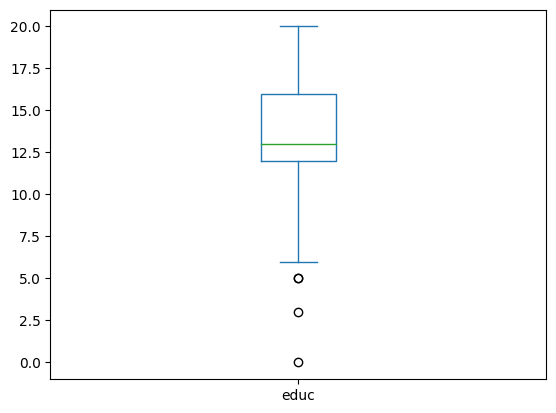

In [8]:
df['educ'].plot.box() #boxplot

In [9]:
# Check unique values for "race" variable
unique_race= df['race'].unique()
print(unique_race)

print(df['race'].value_counts(), '\n') # Check the value counts for 'race' variable

nan_count = df['race'].isna().sum()
print("Number of NaN values in 'race' column:", nan_count) # Number of NaN values

missing_values = df['race'].isnull().sum() # Check missing values
print("Number of missing values in race:", missing_values)

print(df['race'].describe()) # Looking at statistics

['white' 'other' 'black' nan]
white    328
black     43
other     16
Name: race, dtype: int64 

Number of NaN values in 'race' column: 3
Number of missing values in race: 3
count       387
unique        3
top       white
freq        328
Name: race, dtype: object


In [10]:
df['race'].fillna('other', inplace=True) # Replacing the NaN values with the other (avg or would not be suitable in this circumstance)
print(df['race'].value_counts(), '\n') # Making sure NaNs were replaced

white    328
black     43
other     19
Name: race, dtype: int64 



In [11]:
unique_gunlaw= df['gunlaw'].unique() # Check unique values for 'gunlaw' variable
print(unique_gunlaw)

print(df['gunlaw'].value_counts(), '\n') # Check the value counts for 'gunlaw' variable

nan_count = df['gunlaw'].isna().sum()
print("Number of NaN values in 'gunlaw' column:", nan_count) # Number of NaN values

missing_values = df['gunlaw'].isnull().sum() # Check missing values
print("Number of missing values in gunlaw:", missing_values)

['oppose' 'favor' nan]
favor     150
oppose    109
Name: gunlaw, dtype: int64 

Number of NaN values in 'gunlaw' column: 131
Number of missing values in gunlaw: 131


In [12]:
df['gunlaw'].fillna('not disclosed', inplace=True) # Replacing the NaN values with 'not disclosed'
print(df['gunlaw'].value_counts(), '\n') # Making sure NaNs were replaced

print(df['gunlaw'].describe()) # Looking at statistics

favor            150
not disclosed    131
oppose           109
Name: gunlaw, dtype: int64 

count       390
unique        3
top       favor
freq        150
Name: gunlaw, dtype: object


In [13]:
vars = ['partyid','sex','educ','race']
y = df['gunlaw'] # Create target variable vector
X = df.loc[:,vars] # Create feature matrix
print(X,y)

                                partyid     sex  educ   race
0    independent (neither, no response)    male  13.0  white
1              not very strong democrat  female  16.0  white
2      independent, close to republican  female  12.0  white
3      independent, close to republican  female  17.0  white
4            not very strong republican  female  14.0  white
..                                  ...     ...   ...    ...
385      independent, close to democrat  female  12.0  white
386  independent (neither, no response)  female  19.0  white
387      independent, close to democrat    male  15.0  white
388      independent, close to democrat  female  17.0  white
389            not very strong democrat    male  20.0  white

[390 rows x 4 columns] 0             oppose
1             oppose
2             oppose
3              favor
4              favor
           ...      
385            favor
386           oppose
387    not disclosed
388            favor
389    not disclosed
Name: gunlaw,

In [14]:
df.loc[:,var_list].to_csv('clean_data.csv',
                              mode=modes[phase],
                              header=var_list,
                              index=False)

**Results**

When examining party affiliation and its association with attitudes towards firearm policy, there does appear to be a trend. The bar chart in the figure illustrates a polarization of views based on the individual’s party affiliation. This trend, however, is not seen in those who identify themselves as completely independent.

For those who appear to be more right-leaning (strong republican, not very strong republican, and independent - close to republican) there is a much greater opposition for a gun law, with more than half (52.3%) identifying as opposed. There is a much lower percentage for those in favor of the law(38.67%). Individuals that lean towards the left (strong democrat, not very strong democrat, and independent close to democrat) conversely have a lower proportion in favor of the law as compared to those who lean more towards the right in opposition (38%). They do, however, exhibit a similar trend as those who are right-leaning with an even lower percentage of those on the opposing side (15.6%). Independents have a much more balanced distribution throughout the categories with similar percentages (21.33% in favorand 25.69% in opposition) despite most individuals in the dataset identifying as independent.  It is worth noting that others who identify themselves with other parties constitute a smaller proportion of (less than 10%) across all three categories. Additionally, It should be noted that those who opted to not disclose their opinion on the topic make up a sizable portion as well (131 individuals).



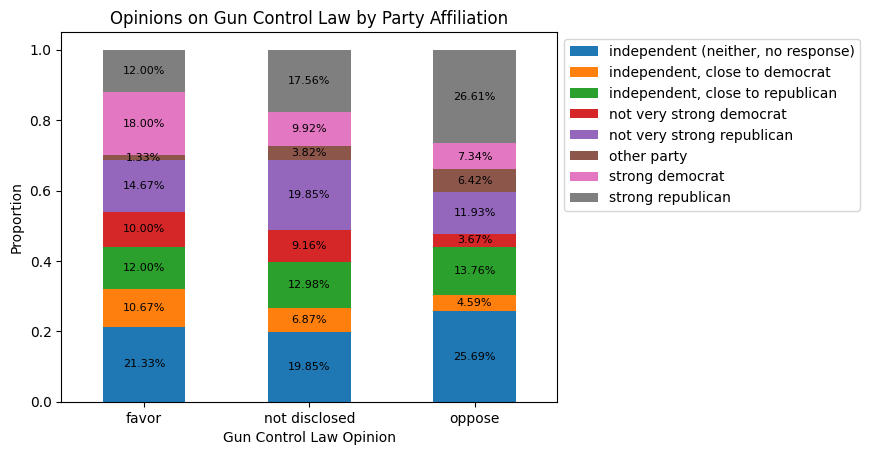

In [17]:
# Visualization 1: Stacked Bar Chart of Opinions on Gun Control Law by Party Affiliation
gunlaw_party = df.groupby(['gunlaw', 'partyid']).size().unstack()
gunlaw_party_percentage = gunlaw_party.div(gunlaw_party.sum(axis=1), axis=0)
subplot = gunlaw_party_percentage.plot(kind='bar', stacked=True)

for i in subplot.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    percentage = f'{height * 100:.2f}%'
    subplot.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center',
                fontsize = 8)

plt.title('Opinions on Gun Control Law by Party Affiliation')
plt.xlabel('Gun Control Law Opinion')
plt.ylabel('Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

When examining race, it is apparent the vast majority of the individuals surveyed are white Americans, with black and other races making up only 62 participants of the total 390. Across these categories however, there are some trends that can be identified as shown in the figure.

A majority of white Americans are in favor of a gun law, (124 individuals), but those who chose not to disclose are very similar in number (114 individuals). Those who did not disclose are trailing behind (90 individuals). Similarly, with black Americans the majority favor of a gun law (19 individuals), followed by those who did not disclose (14 individuals) and those who are in opposition (10 individuals). Individuals of other races or chose not to identify do not follow this same pattern as there are more who oppose gun law (9 individuals) versus those who are in favor (7 Individuals). Three of the individuals in this category chose not to disclose.




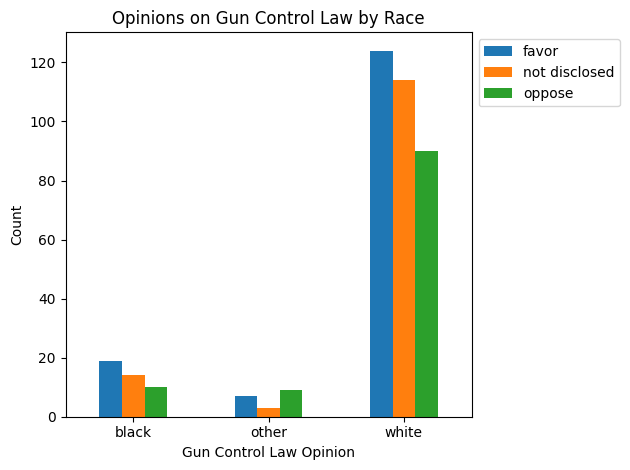

In [18]:
# Visualization 2: Grouped Bar Chart of Opinions on Gun Control Law by Race
gunlaw_party = df.groupby(['race', 'gunlaw']).size().unstack()
gunlaw_party.plot(kind='bar')
plt.title('Opinions on Gun Control Law by Race')
plt.xlabel('Gun Control Law Opinion')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

At the educational level, it does appear that those who have at least completed high school are more in favor of a gun law on firearms, or choose not to disclose their opinion. Additionally, there does appear to be some left-skewness in the distribution of those who have higher education levels as shown in figure 3.

For those in favor of a gun law, it can be said that those in favor of mandating permits have a higher number of individuals who have completed at least one year of college (86 individuals), in comparison to those who are in opposition (75 individuals). A similar trend is recognized for those who have completed high school in favor of a gun law(43 individuals) versus those in opposition (35 individuals). The education levels for those in favor also appear to be a bit more varied compared to those who are in opposition as well. Those who did not disclose their opinion had a similar histogram to those who were in favor with 75 completing at least one year of college, and 39 completing high school as the highest level of education.


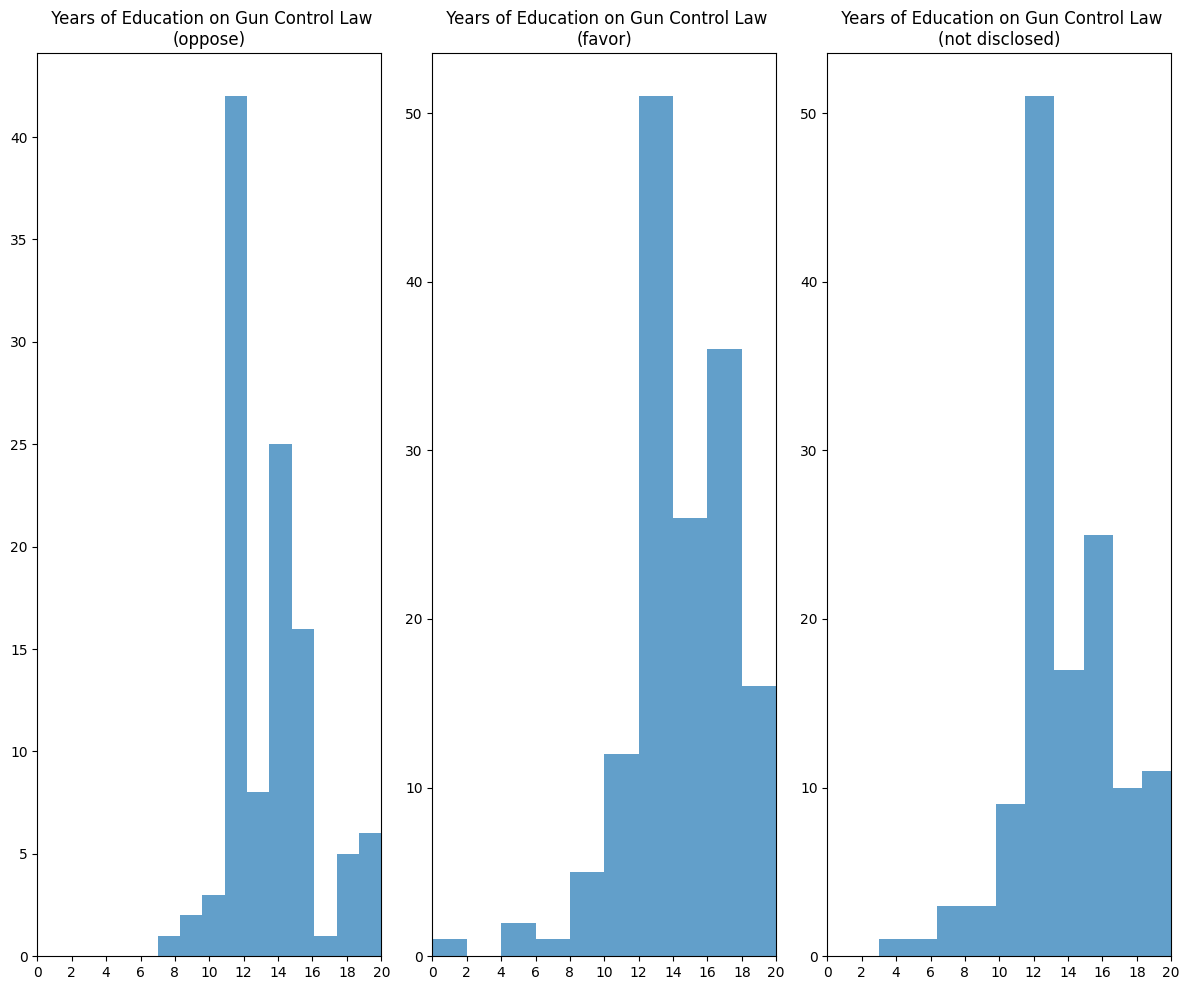

In [19]:
# Visualization 3: Histograms of Years of Education and Opinion on Gun Control Law

opinions = df['gunlaw'].unique()
plt.figure(figsize=(12, 10))

xlimits = (0, 20)
xticks = list(range(0, 22, 2))
for i, o in enumerate(opinions):
    plt.subplot(1, 3, i + 1)
    subset = df[df['gunlaw'] == o]
    plt.hist(subset['educ'], bins=10, alpha=0.7)
    plt.xlim(xlimits)
    plt.xticks(xticks)
    plt.title(f' Years of Education on Gun Control Law\n({o})')
plt.tight_layout()
plt.show()




In summary, party affiliation, education level, and race appear to be factors that play a role in the opinion of a law that would require a permit before buying a gun. Of these variables, it is most clearly observed with party affiliation, where there is a distinct polarization. Individuals who typically identify themselves as more left-leaning are shown to be more in favor of a gun law that requires a permit, whereas right-leaning individuals tend to be more opposed to this. Those who are independent do not have this polarization, and typically are more dispersed in terms of opinion. Regarding race, the result is not as clear, as though most white and black Americans are in favor of a gun law, those who are in opposition are not significantly far behind in number. Education level appears to have an effect, as those who have a higher education level appear to be more in favor of a gun law that permits a gun law before those buy a gun. It can be concluded that those who have a higher education level, that are more right leaning are more in favor of a gun law that requires a permit.
There may be some issues regarding the variable race, however. The sample disproportionately had many white Americans compared with other groups. Not only that, but the only other option was black and other, which is not inclusive to other groups. It would have been much more helpful if other races could have a category as well. The other issue presents itself with the variable, “gunlaw” as there were many individuals who did not disclose their view on the question which impacted how the results were interpreted. There also appeared to be some level skewness in the education level, as the sample had much higher representation for those with higher education. Despite these issues, a trend can still be distinguished based on the given charts.
While this small dataset does provide insight into a cross-section of an opinion regarding the issue of a particular gun law, there are still ongoing studies regarding how these specific variables (education, race, and party affiliation) shape the public opinion. According to Pew Research Center, approximately 86% of democrats (and left-leaning individuals) believe that there should be stricter laws on gun ownership, whereas republicans (and right-leaning individuals) are at a much lower percentage, with 38%. Not only that, but it appears that gun ownership appears to have a promising relationship with laws concerning gun control as gun owners are more in favor of fewer restrictions to obtain a gun. The subject of gun restrictions and how other factors play a role in public policy decisions.


**Works Cited**

Mitchell, T. (2017, June 22). 1. the demographics of gun ownership. Pew Research Center’s Social & Demographic Trends Project. https://www.pewresearch.org/social-trends/2017/06/22/the-demographics-of-gun-ownership
Schaeffer, K. (2023, September 13). Key facts about Americans and guns. Pew Research Center. https://www.pewresearch.org/short-reads/2023/09/13/key-facts-about-americans-and-guns/

